In [1]:
#Importing pandas and matplolib
import pandas as pd
import matplotlib.pyplot as plt

#Reading csv
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
5959,s5960,Movie,Take Me,Pat Healy,"Taylor Schilling, Pat Healy, Alycia Delmore, J...",United States,"July 7, 2017",2017,84,With his simulated kidnapping business flaggin...,Comedies
3650,s3651,Movie,Lion's Heart,Karim El Sobky,"Mohamed Ramadan, Hassan Hosny, Horeya Farghaly...",Egypt,"May 9, 2019",2013,111,"Kidnapped as a child and raised in the circus,...",Action
2263,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,11,Frasier Crane is a snooty but lovable Seattle ...,Classic


In [2]:
#Filtering data as movies from type
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]
netflix_subset.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
2549,s2550,Movie,Guilty,Ruchi Narain,"Kiara Advani, Akansha Ranjan Kapoor, Gurfateh ...",India,"March 6, 2020",2020,120,When a college heartthrob is accused of rape b...,Dramas
772,s773,Movie,Bayonet,Kyzza Terrazas,"Luis Gerardo Méndez, Brontis Jodorowsky, Joona...",Mexico,"March 29, 2019",2019,102,"Alone in Finland, a retired Mexican boxer live...",Dramas


In [3]:
#Filtering a new DataFrames
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]
netflix_movies.sample(3)

,title,country,genre,release_year,duration
2022,Eric ldle's What About Dick?,United States,Comedies,2012,81
4632,Once Upon a Time in London,United Kingdom,Dramas,2019,111
1060,Bosta,Lebanon,Dramas,2005,112


In [4]:
#Filtering DataFrame by Movie duration
short_movies = netflix_movies[netflix_movies["duration"] < 60]
print(short_movies.head(20))

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

In [5]:
#Exploring columns genres
netflix_movies["genre"].unique()

array(['Dramas', 'Horror Movies', 'Action', 'Documentaries',
       'Independent Movies', 'Comedies', 'Sports Movies', 'Uncategorized',
       'International Movies', 'Sci-Fi', 'Children', 'Classic Movies',
       'Thrillers', 'Stand-Up', 'Anime Features', 'Music', 'Cult Movies',
       'Romantic Movies', 'LGBTQ Movies'], dtype=object)

In [6]:
##Assing colors to movie genres
colors = []
for index, row in netflix_movies.iterrows():
    genre = row["genre"]
    if genre in ["Dramas", "Horror Movies", "Action", "Documentaries",
                 "Independent Movies", "Comedies", "Sports Movies", "Uncategorized",
                 "International Movies", "Sci-Fi", "Children", "Classic Movies",
                 "Thrillers", "Stand-Up", "Anime Features", "Music", "Cult Movies",
                 "Romantic Movies", "LGBTQ Movies"]:
        if genre in ["Dramas", "Romantic Movies"]:
            colors.append("red")
        elif genre in ["Horror Movies", "Thrillers"]:
            colors.append("black")
        elif genre in ["Action", "Sports Movies"]:
            colors.append("blue")
        elif genre in ["Documentaries", "Independent Movies","International Movies"]:
            colors.append("green")
        elif genre in ["Comedies", "Stand-Up"]:
            colors.append("yellow")
        elif genre in ["Children", "Animation"]:
            colors.append("orange")
        elif genre in ["Classic Movies", "Cult Movies"]:
            colors.append("purple")
        elif genre in ["Sci-Fi", "Fantasy"]:
            colors.append("cyan")
        elif genre in ["Music"]:
            colors.append("pink")
        elif genre in ["Anime Features"]:
            colors.append("brown")
        elif genre in ["LGBTQ Movies"]:
            colors.append("magenta")
        else:
            colors.append("gray")  # Default color for uncategorized genres
    else:
        colors.append("gray")

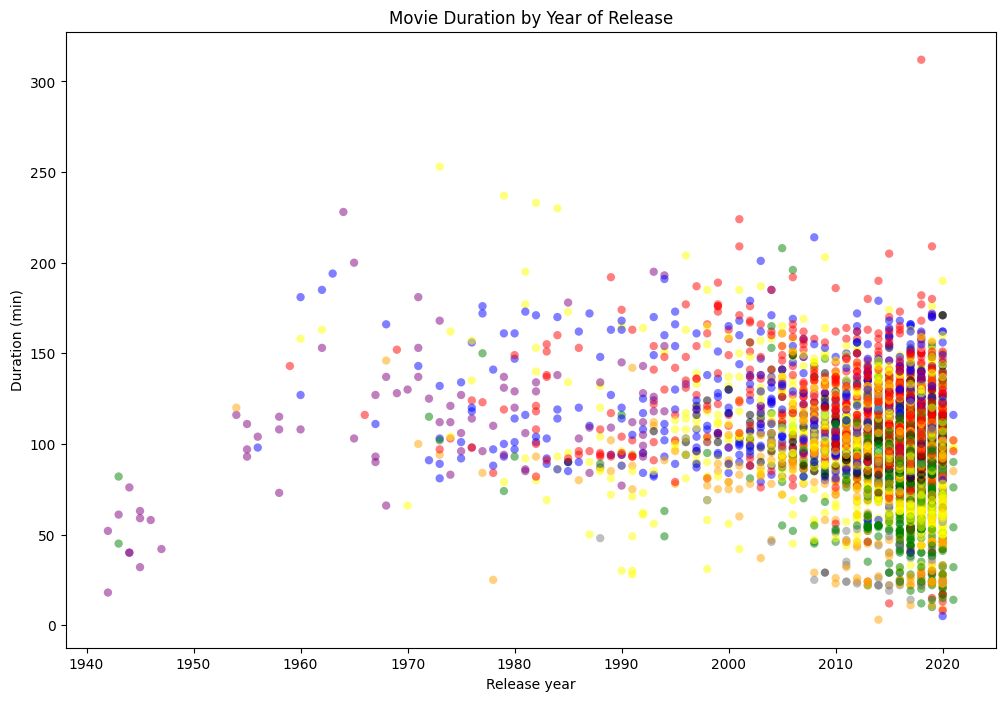

In [8]:
#Creating movie duration by year using genre colors
fig, ax = plt.subplots(figsize=(12,8))
scatter = ax.scatter(netflix_movies["release_year"],netflix_movies["duration"], c=colors, alpha=0.5, edgecolors="none" )

ax.set_xlabel("Release year")
ax.set_ylabel("Duration (min)")
ax.set_title("Movie Duration by Year of Release")

plt.show()

In [9]:
#Are we certain that movies are getting shorter?
avg_duration_year = netflix_movies.groupby("release_year")["duration"].mean()

if avg_duration_year.idxmin() < avg_duration_year.idxmax():
    answer = "yes"
elif avg_duration_year.idxmin() > avg_duration_year.idxmax():
    answer = "no"
else:
    answer = "maybe"

In [11]:
print(avg_duration_year.sample(3))

release_year
1978     90.833333
1973    123.100000
2003    117.125000
Name: duration, dtype: float64
